In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import tensorflow as tf

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Dropout,LeakyReLU,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.losses import BinaryCrossentropy
from tensorflow.keras.applications import ResNet50V2
from keras.callbacks import EarlyStopping

In [ ]:
path = "E:/Thesis/images/"
train_path = path + "train/"
val_path = path + "val/"
test_path = path + "test/"

In [ ]:
effusion = glob.glob(train_path+"effusion/*.png")
atelectasis = glob.glob(train_path+"atelectasis/*.png")

In [ ]:
number_of_effusion_img = len(effusion)
number_of_atelectasis_img = len(atelectasis)
print("number of effusion images:", number_of_effusion_img)
print("number of atelectasis images:", number_of_atelectasis_img)

number of effusion images: 2500
number of atelectasis images: 2500


In [ ]:
train_val_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train = train_val_generator.flow_from_directory(train_path,
                                               batch_size=20,
                                               target_size=(220,220),
                                               color_mode="rgb",
                                               class_mode="binary",
                                               shuffle=True,
                                               seed=42,
                                               subset="training")

Found 5000 images belonging to 2 classes.


In [ ]:
val = train_val_generator.flow_from_directory(val_path,
                                               batch_size=20,
                                               target_size=(220,220),
                                               color_mode="rgb",
                                               class_mode="binary",
                                               shuffle=True,
                                               seed=42)

Found 999 images belonging to 2 classes.


In [ ]:
test = test_generator.flow_from_directory(test_path,
                                          batch_size=20,
                                          target_size=(220,220),
                                          color_mode="rgb",
                                          class_mode="binary")

Found 1000 images belonging to 2 classes.


### ResNet50 with "Adam" optimiser

In [ ]:
resnet50 = ResNet50V2(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in resnet50.layers:
    layer.trainable = False
    
resnet_adam = Sequential()

resnet_adam.add(resnet50)

for layer in resnet50.layers:
    layer.trainable = False
    
resnet_adam.add(Flatten())

resnet_adam.add(Dense(units = 128, activation = "relu"))
resnet_adam.add(Dropout(0.5))

resnet_adam.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
resnet_adam.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
resnet_adam.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_10 (Flatten)        (None, 100352)            0         
                                                                 
 dense_20 (Dense)            (None, 128)               12845184  
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 36,410,113
Trainable params: 12,845,313
Non-trainable params: 23,564,800
_________________________________________________________________


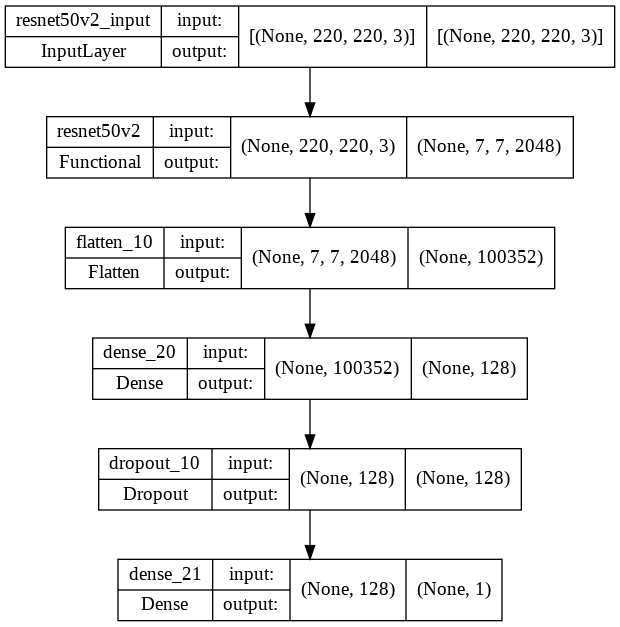

In [ ]:
tf.keras.utils.plot_model(resnet_adam, to_file='resnet_adam.png', show_layer_names=True, show_shapes=True)

In [ ]:
hist = resnet_adam.fit(train, validation_data=val, epochs=10)


Epoch 1/10
250/250 [==============================] - 102s 391ms/step - loss: 1.5070 - accuracy: 0.5856 - val_loss: 0.6338 - val_accuracy: 0.6406
Epoch 2/10
250/250 [==============================] - 96s 383ms/step - loss: 0.6408 - accuracy: 0.6226 - val_loss: 0.6318 - val_accuracy: 0.6817
Epoch 3/10
250/250 [==============================] - 96s 382ms/step - loss: 0.5817 - accuracy: 0.6658 - val_loss: 0.6081 - val_accuracy: 0.6707
Epoch 4/10
250/250 [==============================] - 96s 382ms/step - loss: 0.5574 - accuracy: 0.6728 - val_loss: 0.5927 - val_accuracy: 0.6967
Epoch 5/10
250/250 [==============================] - 96s 382ms/step - loss: 0.5141 - accuracy: 0.7076 - val_loss: 0.5993 - val_accuracy: 0.6967
Epoch 6/10
250/250 [==============================] - 95s 381ms/step - loss: 0.4744 - accuracy: 0.7300 - val_loss: 0.6149 - val_accuracy: 0.6837
Epoch 7/10
250/250 [==============================] - 96s 383ms/step - loss: 0.4395 - accuracy: 0.7484 - val_loss: 0.6111 - val_a

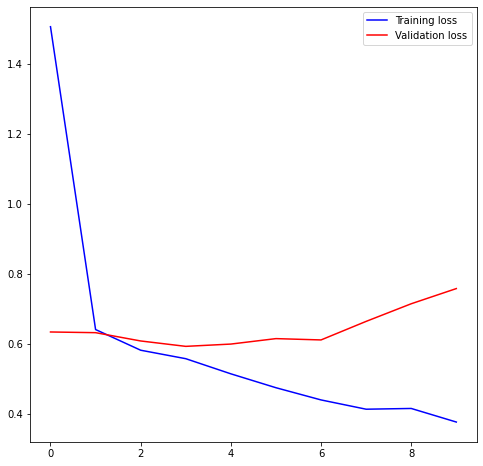

<Figure size 432x288 with 0 Axes>

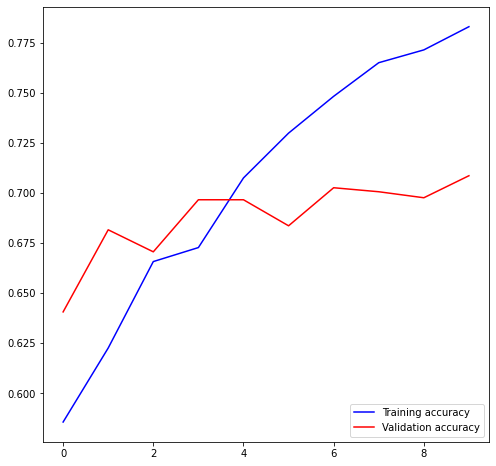

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
test_results = resnet_adam.evaluate(test)

50/50 [==============================] - 16s 317ms/step - loss: 0.8420 - accuracy: 0.6970


### Xception with "Adam" optimiser

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.utils import plot_model

xception = Xception(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in xception.layers:
    layer.trainable = False
    
xception_adam = Sequential()

xception_adam.add(xception)

for layer in xception.layers:
    layer.trainable = False
    
xception_adam.add(Flatten())

xception_adam.add(Dense(units = 128, activation = "relu"))
xception_adam.add(Dropout(0.5))

xception_adam.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
xception_adam.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
xception_adam.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_11 (Flatten)        (None, 100352)            0         
                                                                 
 dense_22 (Dense)            (None, 128)               12845184  
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33,706,793
Trainable params: 12,845,313
Non-trainable params: 20,861,480
_________________________________________________________________


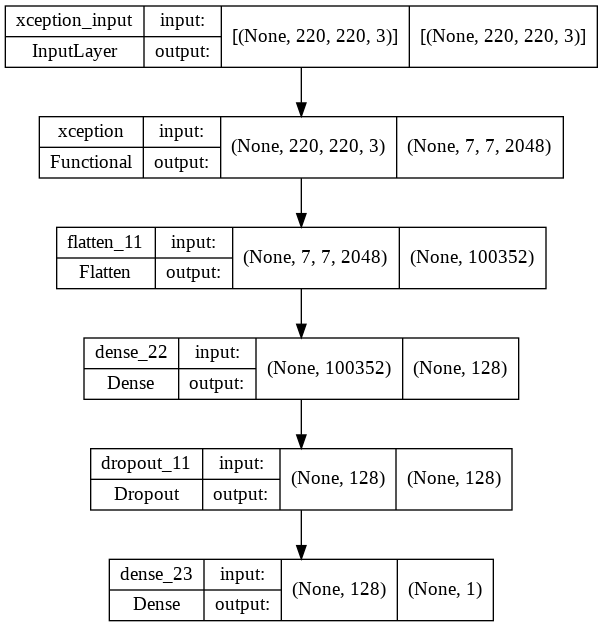

In [ ]:
tf.keras.utils.plot_model(xception_adam, to_file='xception_adam.png', show_layer_names=True, show_shapes=True)

In [ ]:
hist = xception_adam.fit(train, validation_data=val, epochs=10)


Epoch 1/10
250/250 [==============================] - 99s 386ms/step - loss: 1.1265 - accuracy: 0.5330 - val_loss: 0.6780 - val_accuracy: 0.5836
Epoch 2/10
250/250 [==============================] - 96s 382ms/step - loss: 0.6877 - accuracy: 0.5434 - val_loss: 0.6773 - val_accuracy: 0.6086
Epoch 3/10
250/250 [==============================] - 96s 382ms/step - loss: 0.6794 - accuracy: 0.5744 - val_loss: 0.6614 - val_accuracy: 0.6386
Epoch 4/10
250/250 [==============================] - 95s 381ms/step - loss: 0.6706 - accuracy: 0.5766 - val_loss: 0.6643 - val_accuracy: 0.6376
Epoch 5/10
250/250 [==============================] - 95s 380ms/step - loss: 0.6622 - accuracy: 0.5894 - val_loss: 0.6628 - val_accuracy: 0.6276
Epoch 6/10
250/250 [==============================] - 95s 380ms/step - loss: 0.6505 - accuracy: 0.6056 - val_loss: 0.6482 - val_accuracy: 0.6466
Epoch 7/10
250/250 [==============================] - 95s 380ms/step - loss: 0.6461 - accuracy: 0.6056 - val_loss: 0.6415 - val_ac

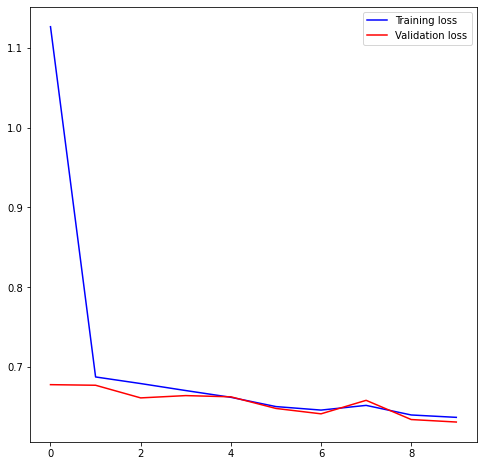

<Figure size 432x288 with 0 Axes>

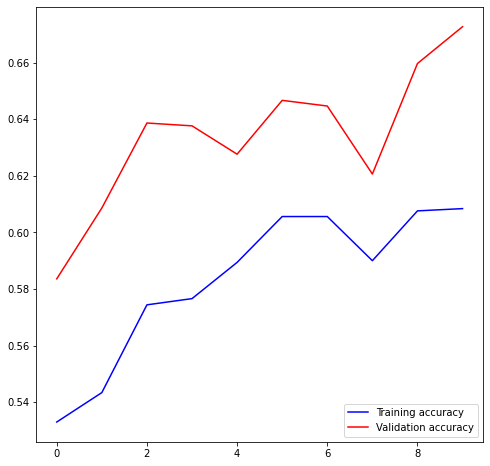

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
test_results = xception_adam.evaluate(test)

50/50 [==============================] - 16s 316ms/step - loss: 0.6254 - accuracy: 0.6570


### Inception with "Adam" optimiser

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.utils import plot_model
inception = InceptionV3(weights = "imagenet", input_shape = (220,220,3), include_top = False)

In [ ]:
for layer in inception.layers:
    layer.trainable = False
    
inception_adam = Sequential()

inception_adam.add(inception)

for layer in inception.layers:
    layer.trainable = False
    
inception_adam.add(Flatten())

inception_adam.add(Dense(units = 128, activation = "relu"))
inception_adam.add(Dropout(0.5))

inception_adam.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
inception_adam.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
inception_adam.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_12 (Flatten)        (None, 51200)             0         
                                                                 
 dense_24 (Dense)            (None, 128)               6553728   
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 129       
                                                                 
Total params: 28,356,641
Trainable params: 6,553,857
Non-trainable params: 21,802,784
_________________________________________________________________


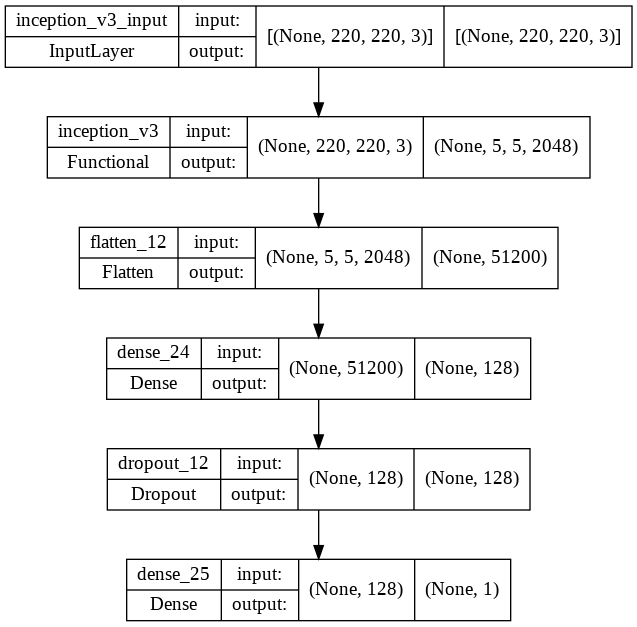

In [ ]:
tf.keras.utils.plot_model(inception_adam, to_file='inception_adam.png', show_layer_names=True, show_shapes=True)

In [ ]:
hist = inception_adam.fit(train, validation_data=val, epochs=10)


Epoch 1/10
250/250 [==============================] - 102s 388ms/step - loss: 1.1236 - accuracy: 0.5026 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 2/10
250/250 [==============================] - 99s 394ms/step - loss: 0.6966 - accuracy: 0.4956 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 3/10
250/250 [==============================] - 97s 388ms/step - loss: 0.6929 - accuracy: 0.4976 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 4/10
250/250 [==============================] - 96s 383ms/step - loss: 0.6931 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 5/10
250/250 [==============================] - 95s 382ms/step - loss: 0.6936 - accuracy: 0.5050 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 6/10
250/250 [==============================] - 95s 381ms/step - loss: 0.6932 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 7/10
250/250 [==============================] - 95s 381ms/step - loss: 0.6932 - accuracy: 0.4952 - val_loss: 0.6931 - val_a

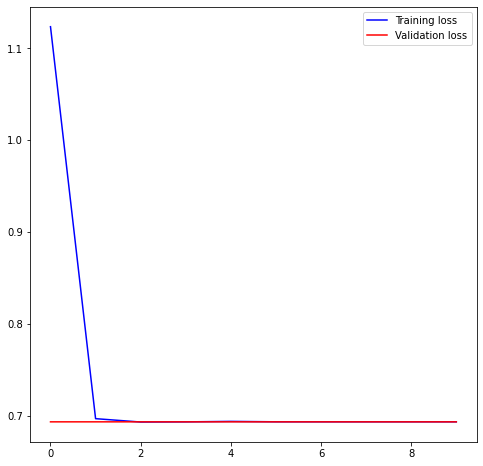

<Figure size 432x288 with 0 Axes>

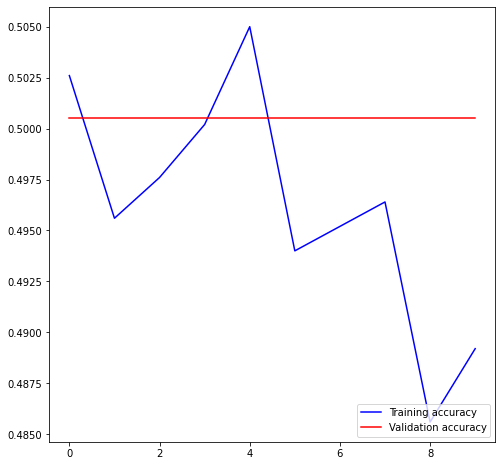

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
test_results = inception_adam.evaluate(test)

50/50 [==============================] - 16s 318ms/step - loss: 0.6931 - accuracy: 0.5000


### ResNet50 with "Adamax" optimiser

In [ ]:
resnet50 = ResNet50V2(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in resnet50.layers:
    layer.trainable = False
    
resnet_adamax = Sequential()

resnet_adamax.add(resnet50)

for layer in resnet50.layers:
    layer.trainable = False
    
resnet_adamax.add(Flatten())

resnet_adamax.add(Dense(units = 128, activation = "relu"))
resnet_adamax.add(Dropout(0.5))

resnet_adamax.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
resnet_adamax.compile(optimizer = "Adamax", loss = "binary_crossentropy", metrics = ["accuracy"])
resnet_adamax.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_13 (Flatten)        (None, 100352)            0         
                                                                 
 dense_26 (Dense)            (None, 128)               12845184  
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 36,410,113
Trainable params: 12,845,313
Non-trainable params: 23,564,800
_________________________________________________________________


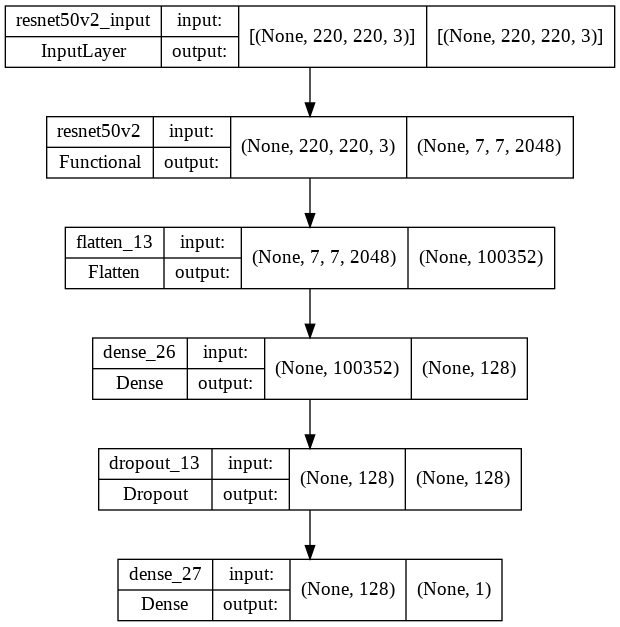

In [ ]:
tf.keras.utils.plot_model(resnet_adamax, to_file='resnet_adamax.png', show_layer_names=True, show_shapes=True)

In [ ]:
hist = resnet_adamax.fit(train, validation_data=val, epochs=10)

Epoch 1/10
250/250 [==============================] - 99s 385ms/step - loss: 1.4052 - accuracy: 0.5774 - val_loss: 0.6372 - val_accuracy: 0.6747
Epoch 2/10
250/250 [==============================] - 95s 382ms/step - loss: 0.6016 - accuracy: 0.6788 - val_loss: 0.5946 - val_accuracy: 0.7027
Epoch 3/10
250/250 [==============================] - 95s 379ms/step - loss: 0.5534 - accuracy: 0.7074 - val_loss: 0.5798 - val_accuracy: 0.7037
Epoch 4/10
250/250 [==============================] - 96s 383ms/step - loss: 0.5005 - accuracy: 0.7364 - val_loss: 0.5838 - val_accuracy: 0.7007
Epoch 5/10
250/250 [==============================] - 95s 381ms/step - loss: 0.4595 - accuracy: 0.7644 - val_loss: 0.5882 - val_accuracy: 0.6917
Epoch 6/10
250/250 [==============================] - 95s 381ms/step - loss: 0.4141 - accuracy: 0.7992 - val_loss: 0.6147 - val_accuracy: 0.6837
Epoch 7/10
250/250 [==============================] - 95s 381ms/step - loss: 0.3658 - accuracy: 0.8192 - val_loss: 0.6313 - val_ac

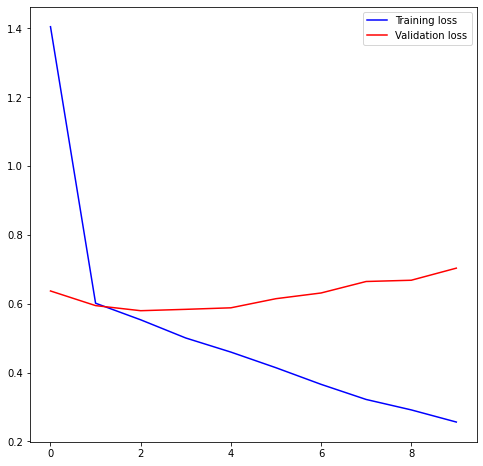

<Figure size 432x288 with 0 Axes>

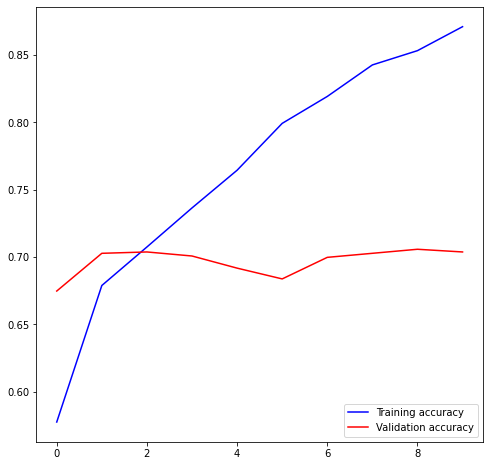

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
test_results = resnet_adamax.evaluate(test)

50/50 [==============================] - 16s 321ms/step - loss: 0.7066 - accuracy: 0.6990


### Xception with "Adamax" optimiser

In [ ]:
xception = Xception(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in xception.layers:
    layer.trainable = False
    
xception_adamax = Sequential()

xception_adamax.add(xception)

for layer in xception.layers:
    layer.trainable = False
    
xception_adamax.add(Flatten())

xception_adamax.add(Dense(units = 128, activation = "relu"))
xception_adamax.add(Dropout(0.5))

xception_adamax.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
xception_adamax.compile(optimizer = "Adamax", loss = "binary_crossentropy", metrics = ["accuracy"])
xception_adamax.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_14 (Flatten)        (None, 100352)            0         
                                                                 
 dense_28 (Dense)            (None, 128)               12845184  
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33,706,793
Trainable params: 12,845,313
Non-trainable params: 20,861,480
_________________________________________________________________


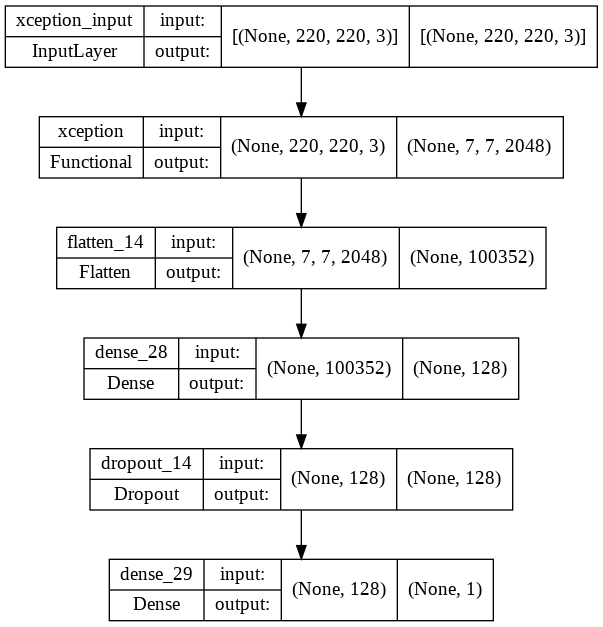

In [ ]:
tf.keras.utils.plot_model(xception_adamax, to_file='xception_adamax.png', show_layer_names=True, show_shapes=True)

In [ ]:
hist = xception_adamax.fit(train, validation_data=val, epochs=10)

Epoch 1/10
250/250 [==============================] - 100s 392ms/step - loss: 1.3235 - accuracy: 0.5732 - val_loss: 0.6572 - val_accuracy: 0.6206
Epoch 2/10
250/250 [==============================] - 99s 394ms/step - loss: 0.6555 - accuracy: 0.6014 - val_loss: 0.6325 - val_accuracy: 0.6567
Epoch 3/10
250/250 [==============================] - 97s 389ms/step - loss: 0.6385 - accuracy: 0.6250 - val_loss: 0.6408 - val_accuracy: 0.6246
Epoch 4/10
250/250 [==============================] - 98s 391ms/step - loss: 0.6296 - accuracy: 0.6356 - val_loss: 0.6147 - val_accuracy: 0.6677
Epoch 5/10
250/250 [==============================] - 100s 402ms/step - loss: 0.6085 - accuracy: 0.6488 - val_loss: 0.6228 - val_accuracy: 0.6507
Epoch 6/10
250/250 [==============================] - 104s 416ms/step - loss: 0.5958 - accuracy: 0.6596 - val_loss: 0.6179 - val_accuracy: 0.6707
Epoch 7/10
250/250 [==============================] - 109s 437ms/step - loss: 0.5871 - accuracy: 0.6672 - val_loss: 0.5936 - va

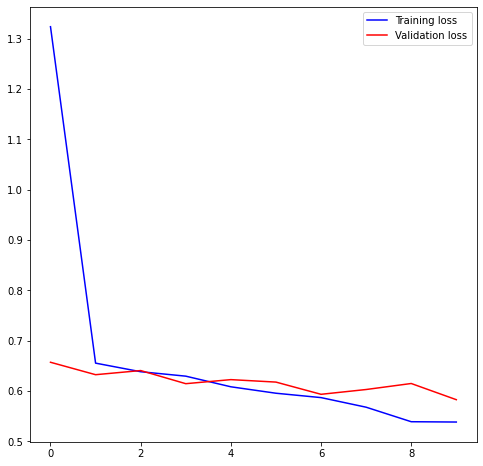

<Figure size 432x288 with 0 Axes>

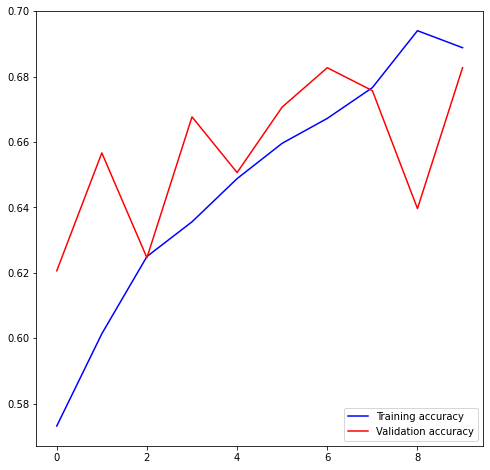

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
test_results = xception_adamax.evaluate(test)

50/50 [==============================] - 16s 326ms/step - loss: 0.5942 - accuracy: 0.6610


### Inception with "Adamax" optimiser

In [ ]:
inception = InceptionV3(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in inception.layers:
    layer.trainable = False
    
inception_adamax = Sequential()

inception_adamax.add(inception)

for layer in inception.layers:
    layer.trainable = False
    
inception_adamax.add(Flatten())

inception_adamax.add(Dense(units = 128, activation = "relu"))
inception_adamax.add(Dropout(0.5))

inception_adamax.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
inception_adamax.compile(optimizer = "Adamax", loss = "binary_crossentropy", metrics = ["accuracy"])
inception_adamax.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_15 (Flatten)        (None, 51200)             0         
                                                                 
 dense_30 (Dense)            (None, 128)               6553728   
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 1)                 129       
                                                                 
Total params: 28,356,641
Trainable params: 6,553,857
Non-trainable params: 21,802,784
_________________________________________________________________


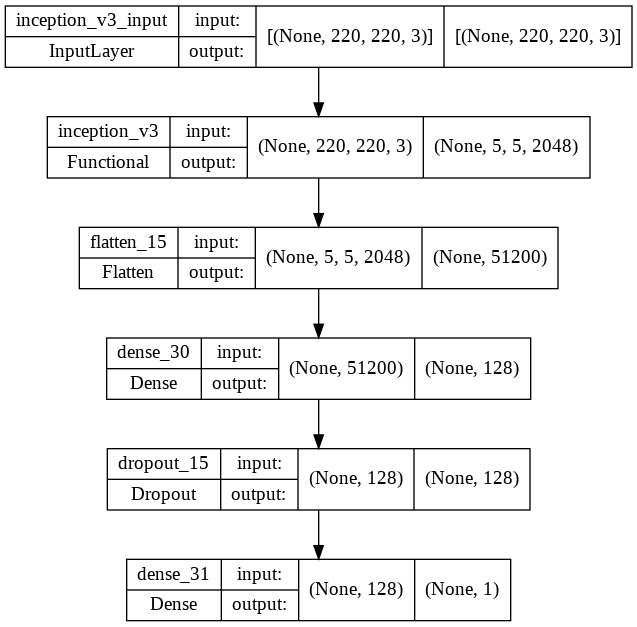

In [ ]:
tf.keras.utils.plot_model(inception_adamax, to_file='inception_adamax.png', show_layer_names=True, show_shapes=True)

In [ ]:
hist = inception_adamax.fit(train, validation_data=val, epochs=10)

Epoch 1/10
250/250 [==============================] - 109s 414ms/step - loss: 1.5937 - accuracy: 0.5388 - val_loss: 0.6754 - val_accuracy: 0.6136
Epoch 2/10
250/250 [==============================] - 100s 398ms/step - loss: 0.6661 - accuracy: 0.5780 - val_loss: 0.6875 - val_accuracy: 0.6046
Epoch 3/10
250/250 [==============================] - 98s 391ms/step - loss: 0.6502 - accuracy: 0.6112 - val_loss: 0.6335 - val_accuracy: 0.6577
Epoch 4/10
250/250 [==============================] - 97s 387ms/step - loss: 0.6483 - accuracy: 0.5952 - val_loss: 0.6228 - val_accuracy: 0.6727
Epoch 5/10
250/250 [==============================] - 96s 385ms/step - loss: 0.6319 - accuracy: 0.5972 - val_loss: 0.6282 - val_accuracy: 0.6747
Epoch 6/10
250/250 [==============================] - 95s 380ms/step - loss: 0.6217 - accuracy: 0.6072 - val_loss: 0.6167 - val_accuracy: 0.6727
Epoch 7/10
250/250 [==============================] - 95s 380ms/step - loss: 0.6063 - accuracy: 0.6332 - val_loss: 0.6058 - val_

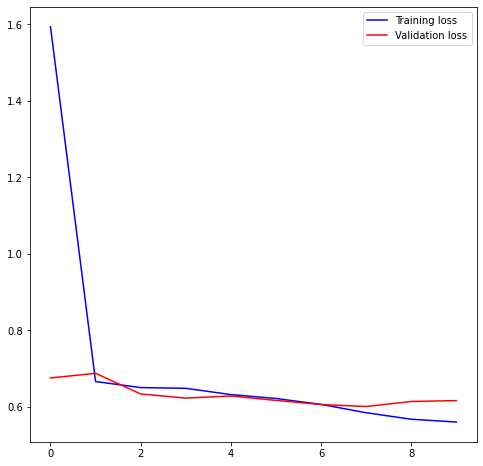

<Figure size 432x288 with 0 Axes>

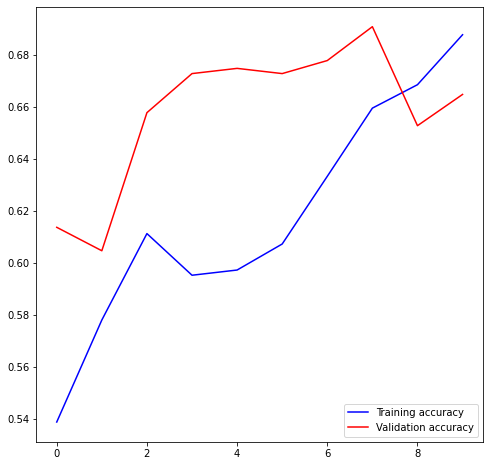

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
test_results = inception_adamax.evaluate(test)

50/50 [==============================] - 17s 333ms/step - loss: 0.6346 - accuracy: 0.6280


### ResNet50 with "Nadam" optimiser

In [ ]:
resnet50 = ResNet50V2(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in resnet50.layers:
    layer.trainable = False
    
resnet_nadam = Sequential()

resnet_nadam.add(resnet50)

for layer in resnet50.layers:
    layer.trainable = False
    
resnet_nadam.add(Flatten())

resnet_nadam.add(Dense(units = 128, activation = "relu"))
resnet_nadam.add(Dropout(0.5))

resnet_nadam.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
resnet_nadam.compile(optimizer = "Nadam", loss = "binary_crossentropy", metrics = ["accuracy"])
resnet_nadam.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_16 (Flatten)        (None, 100352)            0         
                                                                 
 dense_32 (Dense)            (None, 128)               12845184  
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 1)                 129       
                                                                 
Total params: 36,410,113
Trainable params: 12,845,313
Non-trainable params: 23,564,800
_________________________________________________________________


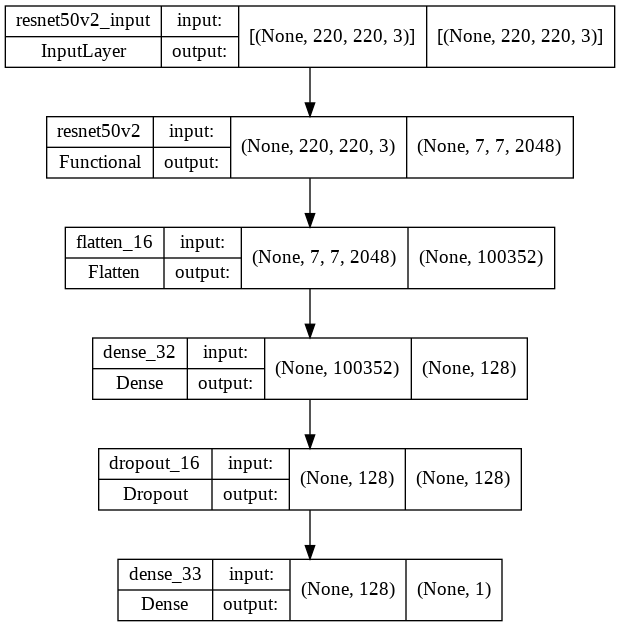

In [ ]:
tf.keras.utils.plot_model(resnet_nadam, to_file='resnet_nadam.png', show_layer_names=True, show_shapes=True)

In [ ]:
hist = resnet_nadam.fit(train, validation_data=val, epochs=10)

Epoch 1/10
250/250 [==============================] - 101s 390ms/step - loss: 1.2914 - accuracy: 0.5534 - val_loss: 0.6710 - val_accuracy: 0.5606
Epoch 2/10
250/250 [==============================] - 95s 380ms/step - loss: 0.6460 - accuracy: 0.6160 - val_loss: 0.6332 - val_accuracy: 0.6396
Epoch 3/10
250/250 [==============================] - 96s 382ms/step - loss: 0.6079 - accuracy: 0.6388 - val_loss: 0.6269 - val_accuracy: 0.6607
Epoch 4/10
250/250 [==============================] - 95s 380ms/step - loss: 0.5679 - accuracy: 0.6620 - val_loss: 0.5964 - val_accuracy: 0.6917
Epoch 5/10
250/250 [==============================] - 95s 379ms/step - loss: 0.5461 - accuracy: 0.6782 - val_loss: 0.6226 - val_accuracy: 0.6887
Epoch 6/10
250/250 [==============================] - 95s 379ms/step - loss: 0.5320 - accuracy: 0.6866 - val_loss: 0.5999 - val_accuracy: 0.6697
Epoch 7/10
250/250 [==============================] - 97s 387ms/step - loss: 0.5726 - accuracy: 0.7062 - val_loss: 0.6562 - val_a

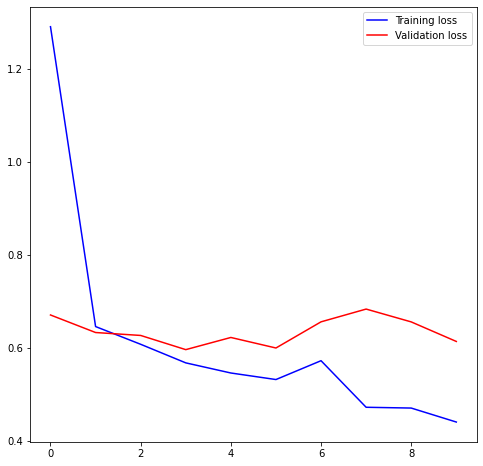

<Figure size 432x288 with 0 Axes>

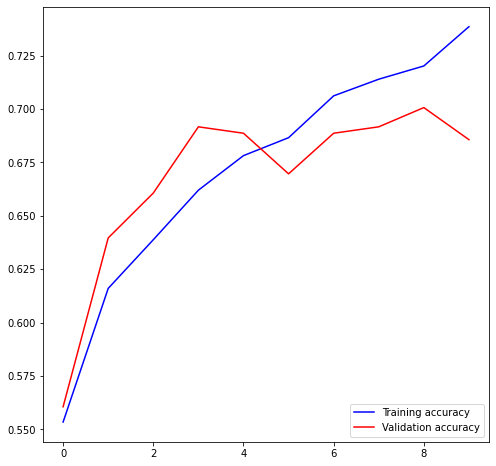

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
test_results = resnet_nadam.evaluate(test)

50/50 [==============================] - 16s 322ms/step - loss: 0.6402 - accuracy: 0.6630


### Xception with "Nadam" optimiser

In [ ]:
xception = Xception(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in xception.layers:
    layer.trainable = False
    
xception_nadam = Sequential()

xception_nadam.add(xception)

for layer in xception.layers:
    layer.trainable = False
    
xception_nadam.add(Flatten())

xception_nadam.add(Dense(units = 128, activation = "relu"))
xception_nadam.add(Dropout(0.5))

xception_nadam.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
xception_nadam.compile(optimizer = "Nadam", loss = "binary_crossentropy", metrics = ["accuracy"])
xception_nadam.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_17 (Flatten)        (None, 100352)            0         
                                                                 
 dense_34 (Dense)            (None, 128)               12845184  
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33,706,793
Trainable params: 12,845,313
Non-trainable params: 20,861,480
_________________________________________________________________


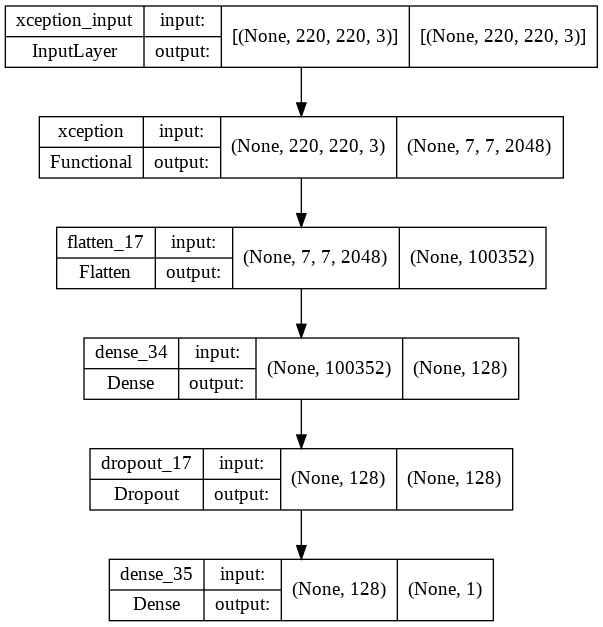

In [ ]:
tf.keras.utils.plot_model(xception_nadam, to_file='xception_nadam.png', show_layer_names=True, show_shapes=True)

In [ ]:
hist = xception_nadam.fit(train, validation_data=val, epochs=10)

Epoch 1/10
250/250 [==============================] - 100s 391ms/step - loss: 1.0108 - accuracy: 0.5440 - val_loss: 0.6536 - val_accuracy: 0.6446
Epoch 2/10
250/250 [==============================] - 97s 387ms/step - loss: 0.6719 - accuracy: 0.5600 - val_loss: 0.6470 - val_accuracy: 0.6537
Epoch 3/10
250/250 [==============================] - 96s 384ms/step - loss: 0.6600 - accuracy: 0.5758 - val_loss: 0.6436 - val_accuracy: 0.6446
Epoch 4/10
250/250 [==============================] - 96s 383ms/step - loss: 0.6401 - accuracy: 0.5760 - val_loss: 0.6516 - val_accuracy: 0.6587
Epoch 5/10
250/250 [==============================] - 96s 383ms/step - loss: 0.6279 - accuracy: 0.6040 - val_loss: 0.6109 - val_accuracy: 0.6757
Epoch 6/10
250/250 [==============================] - 96s 384ms/step - loss: 0.6160 - accuracy: 0.5982 - val_loss: 0.6140 - val_accuracy: 0.6306
Epoch 7/10
250/250 [==============================] - 95s 381ms/step - loss: 0.6007 - accuracy: 0.6040 - val_loss: 0.6031 - val_a

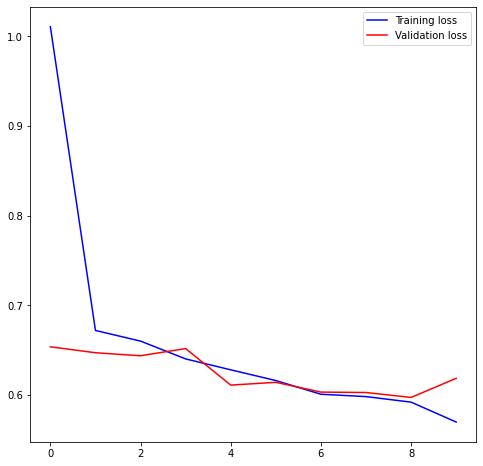

<Figure size 432x288 with 0 Axes>

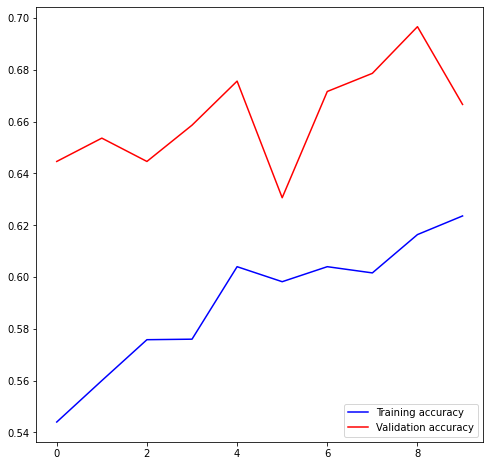

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
test_results = xception_nadam.evaluate(test)

50/50 [==============================] - 16s 317ms/step - loss: 0.6453 - accuracy: 0.6320


### Inception with "Nadam" optimiser

In [ ]:
inception = InceptionV3(weights = "imagenet", input_shape = (220,220,3), include_top = False)

for layer in inception.layers:
    layer.trainable = False
    
inception_nadam = Sequential()

inception_nadam.add(inception)

for layer in inception.layers:
    layer.trainable = False
    
inception_nadam.add(Flatten())

inception_nadam.add(Dense(units = 128, activation = "relu"))
inception_nadam.add(Dropout(0.5))

inception_nadam.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
inception_nadam.compile(optimizer = "Nadam", loss = "binary_crossentropy", metrics = ["accuracy"])
inception_nadam.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_18 (Flatten)        (None, 51200)             0         
                                                                 
 dense_36 (Dense)            (None, 128)               6553728   
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 1)                 129       
                                                                 
Total params: 28,356,641
Trainable params: 6,553,857
Non-trainable params: 21,802,784
_________________________________________________________________


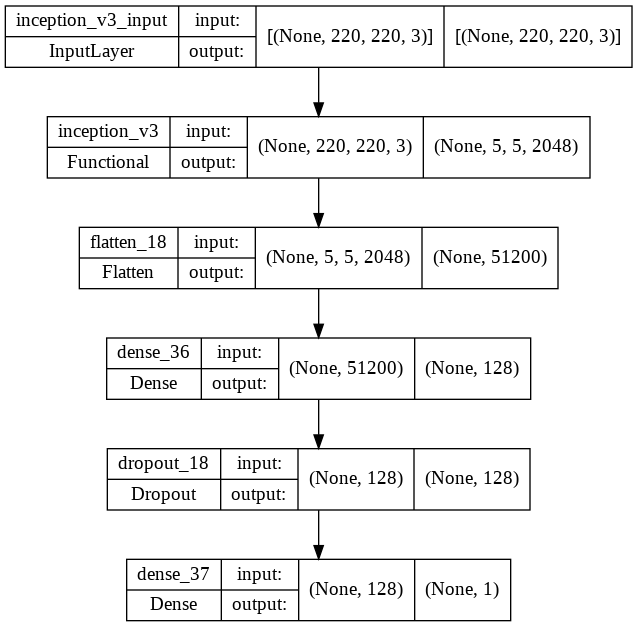

In [ ]:
tf.keras.utils.plot_model(inception_nadam, to_file='inception_nadam.png', show_layer_names=True, show_shapes=True)

In [ ]:
hist = inception_nadam.fit(train, validation_data=val, epochs=10)

Epoch 1/10
250/250 [==============================] - 101s 387ms/step - loss: 1.1427 - accuracy: 0.5238 - val_loss: 0.6740 - val_accuracy: 0.6326
Epoch 2/10
250/250 [==============================] - 95s 379ms/step - loss: 0.7461 - accuracy: 0.5690 - val_loss: 0.6558 - val_accuracy: 0.6446
Epoch 3/10
250/250 [==============================] - 95s 379ms/step - loss: 0.7330 - accuracy: 0.5744 - val_loss: 0.6623 - val_accuracy: 0.6206
Epoch 4/10
250/250 [==============================] - 95s 378ms/step - loss: 0.6668 - accuracy: 0.5732 - val_loss: 0.6440 - val_accuracy: 0.6577
Epoch 5/10
250/250 [==============================] - 95s 379ms/step - loss: 0.6602 - accuracy: 0.5870 - val_loss: 0.6435 - val_accuracy: 0.6677
Epoch 6/10
250/250 [==============================] - 94s 378ms/step - loss: 0.6467 - accuracy: 0.6012 - val_loss: 0.6390 - val_accuracy: 0.6637
Epoch 7/10
250/250 [==============================] - 94s 378ms/step - loss: 0.6457 - accuracy: 0.6042 - val_loss: 0.6349 - val_a

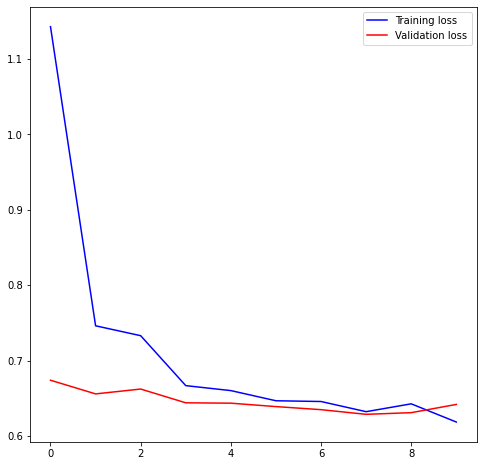

<Figure size 432x288 with 0 Axes>

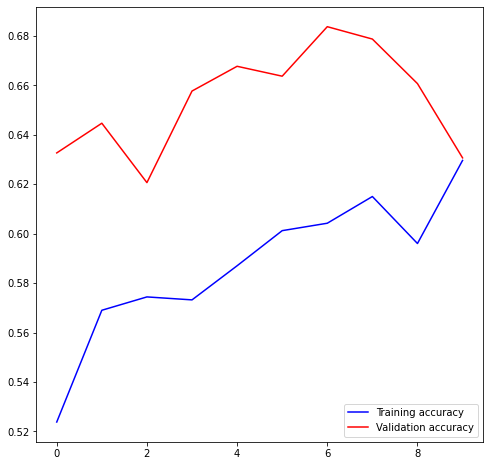

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
test_results = inception_nadam.evaluate(test)

50/50 [==============================] - 16s 314ms/step - loss: 0.6500 - accuracy: 0.6090
